In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
#constantes definition:
#G =
#M =
b = 1      #modif
c = 0.8    #modif
v0 = 10    #modif
#rc =

#CI vitesse:

vx = 0
vy = 10    #modif
vz = 10    #modif

#CI position:

x = 10     #modif
y = 0
z = 0

#r = np.array([x,y,z])


In [3]:
def potential(x,y,z):
    return (v0*v0/2)*math.log((x*x+(y/b)*(y/b)+(z/c)*(z/c))/(rc*rc))

def acceleration_x(x,y,z):
    return -((v0*v0)/(x*x+(y/b)*(y/b)+(z/c)*(z/c)))*x

def acceleration_y(x,y,z):
    return -((v0*v0)/(x*x+(y/b)*(y/b)+(z/c)*(z/c)))*(y/(b*b))

def acceleration_z(x,y,z):
    return -((v0*v0)/(x*x+(y/b)*(y/b)+(z/c)*(z/c)))*(z/(c*c))

In [27]:
#Runge Kutta ordre 4 

#step definition
h=1e-3

#Creations des variables de verification pour la coupe
Verif_X = 0
Verif_Y = 0
Verif_Z = 0

#Definition de l'endroit de la coupe
C_x = 0
C_y = 0
C_z = 0

#listes vides
X = []
Y = []
Z = []
Vx = []
Vy = []
Vz = []
Coupe_Xy = []
Coupe_Xz = []
Coupe_Yx = []
Coupe_Yz = []
Coupe_Zx = []
Coupe_Zy = []

for k in np.arange (0,100,h):

    #ordre1
    kx1 = vx*h
    ky1 = vy*h
    kz1 = vz*h
    ku1 = h*acceleration_x( x, y, z)
    kv1 = h*acceleration_y( x, y, z)
    kw1 = h*acceleration_z( x, y, z)

    #ordre2
    kx2 = (vx+0.5*ku1)*h
    ky2 = (vy+0.5*kv1)*h
    kz2 = (vz+0.5*kw1)*h
    ku2 = h*acceleration_x( x+kx1/2, y+ky1/2, z+kz1/2)
    kv2 = h*acceleration_y( x+kx1/2, y+ky1/2, z+kz1/2)
    kw2 = h*acceleration_z( x+kx1/2, y+ky1/2, z+kz1/2)

    #ordre3
    kx3 = (vx+0.5*ku2)*h
    ky3 = (vy+0.5*kv2)*h
    kz3 = (vz+0.5*kw2)*h
    ku3 = h*acceleration_x( x+kx2/2, y+ky2/2, z+kz2/2)
    kv3 = h*acceleration_y( x+kx2/2, y+ky2/2, z+kz2/2)
    kw3 = h*acceleration_z( x+kx2/2, y+ky2/2, z+kz2/2)

    #ordre4
    kx4 = (vx+ku3)*h
    ky4 = (vy+kv3)*h
    kz4 = (vz+kw3)*h
    ku4 = h*acceleration_x( x+kx3, y+ky3, z+kz3)
    kv4 = h*acceleration_y( x+kx3, y+ky3, z+kz3)
    kw4 = h*acceleration_z( x+kx3, y+ky3, z+kz3)

    #calcul des positions 
    x += (kx1+2*kx2+2*kx3+kx4)/6.
    y += (ky1+2*ky2+2*ky3+ky4)/6.
    z += (kz1+2*kz2+2*kz3+kz4)/6.

    #calcul des vitesses
    vx += (ku1+2*ku2+2*ku3+ku4)/6.
    vy += (kv1+2*kv2+2*kv3+kv4)/6.
    vz += (kw1+2*kw2+2*kw3+kw4)/6.

    #ajout aux listes
    X.append(x)
    Y.append(y)
    Z.append(z)
    Vx.append(vx)
    Vy.append(vy)
    Vz.append(vz)
    
    #Coupe de poincaré :
    n = int(k/h)
    if n > 0 :
        verif_X = (X[n-1]-C_x)*(X[n]-C_x)
        verif_Y = (Y[n-1]-C_y)*(Y[n]-C_y)
        verif_Z = (Z[n-1]-C_z)*(Z[n]-C_z)
        if Verif_X <=0 :
            Coupe_Xy.append(y)
            Coupe_Xz.append(z)
        if Verif_Y <=0 :
            Coupe_Yz.append(z)
            Coupe_Yx.append(x)
        if Verif_Z <=0 :
            Coupe_Zx.append(x)
            Coupe_Zy.append(y)
    

SyntaxError: invalid syntax (1546096226.py, line 91)

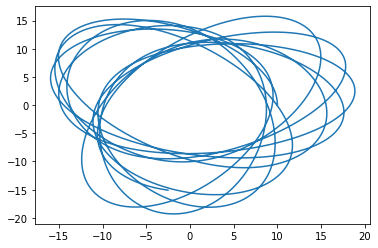

In [7]:
plt.figure()

plt.plot(X,Y)

plt.show()

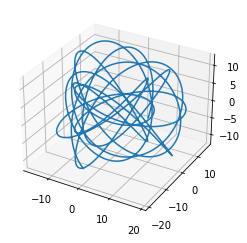

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(X, Y, Z)

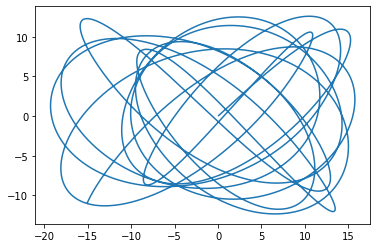

In [9]:
plt.figure()

plt.plot(Coupe_Xy,Coupe_Xz, 'ro')

plt.show()

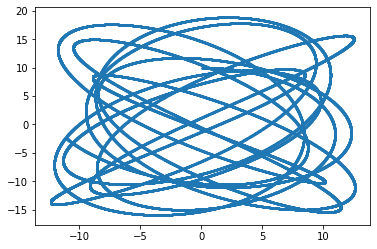

In [24]:
plt.figure()

plt.scatter(Coupe_Yz,Coupe_Yx,s=1)

plt.show()

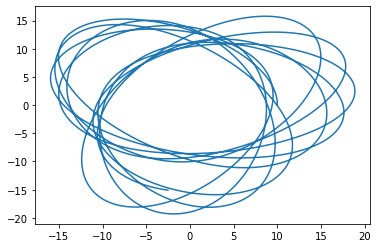

In [11]:
plt.figure()

plt.plot(Coupe_Zx,Coupe_Zy, 'ro')

plt.show()